<a href="https://colab.research.google.com/github/neon0047/TimeSeriesAnalysis/blob/main/energy_others.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import all the necessary packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sbn

### Load the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/energydata_complete.csv')

In [ ]:
data.shape

(19735, 29)

### Lets see the columns which are here

In [ ]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Lets see the data type of each column

In [ ]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### As we can see the data type is float or int everywhere. So, we don't need to do any special preprocessing for each column

### We need to predict the Application Energy

### Lets check for null values

In [ ]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
data['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
5        2016-01-11 17:50:00
6        2016-01-11 18:00:00
7        2016-01-11 18:10:00
8        2016-01-11 18:20:00
9        2016-01-11 18:30:00
10       2016-01-11 18:40:00
11       2016-01-11 18:50:00
12       2016-01-11 19:00:00
13       2016-01-11 19:10:00
14       2016-01-11 19:20:00
15       2016-01-11 19:30:00
16       2016-01-11 19:40:00
17       2016-01-11 19:50:00
18       2016-01-11 20:00:00
19       2016-01-11 20:10:00
20       2016-01-11 20:20:00
21       2016-01-11 20:30:00
22       2016-01-11 20:40:00
23       2016-01-11 20:50:00
24       2016-01-11 21:00:00
25       2016-01-11 21:10:00
26       2016-01-11 21:20:00
27       2016-01-11 21:30:00
28       2016-01-11 21:40:00
29       2016-01-11 21:50:00
                ...         
19705    2016-05-27 13:10:00
19706    2016-05-27 13:20:00
19707    2016-05-27 13:30:00
19708    2016-

### Lets convert the format of the dat to seconds

In [ ]:
data['date'] = pd.to_timedelta(data['date'].astype('datetime64')).dt.seconds

In [ ]:
data['date'].dtype

dtype('int64')

In [ ]:
y = data['Appliances']

In [ ]:
X = data
del X['Appliances']

In [ ]:
X.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
X.shape

(19735, 28)

### Now lets look at the distribution of each feature to understand what extra preprocessing we need to do

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74f0b3f98>,
      dtype=object)

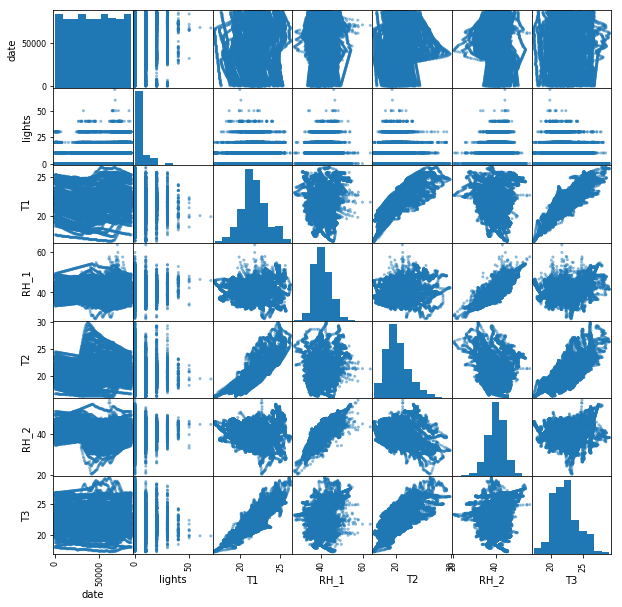

In [ ]:
pd.plotting.scatter_matrix(data.iloc[:,:7],figsize = (10,10))

In [ ]:
X = X.drop(['T2','RH_2','T3'],axis=1)

In [ ]:
X.shape

(19735, 25)

In [ ]:
X['date'].describe()

count    19735.000000
mean     42907.129465
std      24940.020831
min          0.000000
25%      21600.000000
50%      43200.000000
75%      64200.000000
max      85800.000000
Name: date, dtype: float64

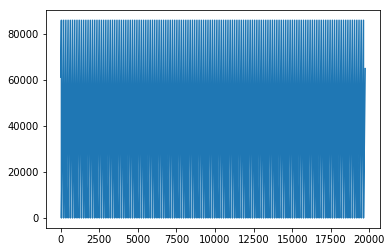

In [ ]:
plt.plot(X['date'])

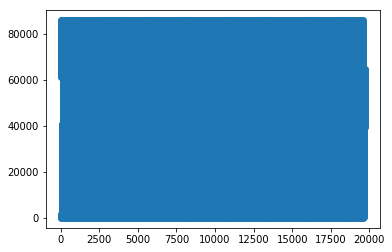

In [ ]:
plt.scatter(np.arange(len(X['date'])),X['date'])

In [ ]:
X = X.drop(['date'],axis=1)

In [ ]:
X.shape

(19735, 24)

#### Lets look at the lights

(array([1.5252e+04, 2.2120e+03, 1.6240e+03, 0.0000e+00, 5.5900e+02,
        7.7000e+01, 0.0000e+00, 9.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

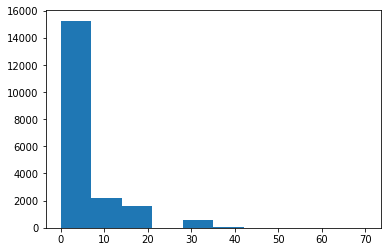

In [ ]:
plt.hist(X['lights'])

In [ ]:
X['lights'].describe()

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: lights, dtype: float64

#### Lets look at the other features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74a922278>,
      dtype=object)

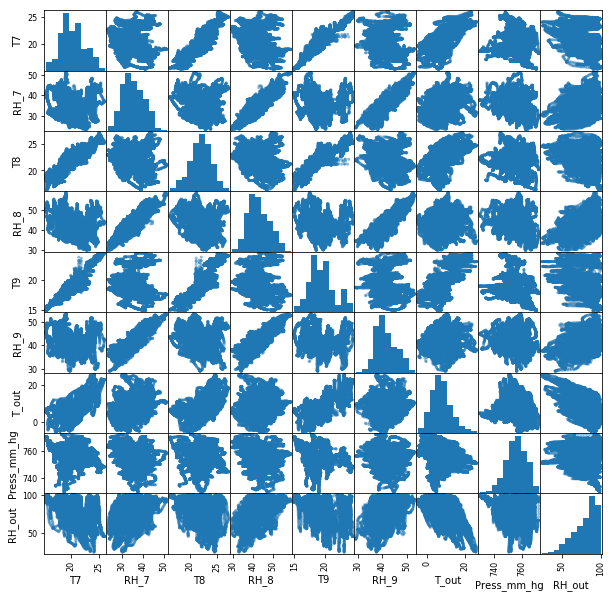

In [ ]:
pd.plotting.scatter_matrix(data.iloc[:,14:23],figsize = (10,10))

In [ ]:
X = X.drop(['T7','T8','RH_7','RH_8'],axis=1)

In [ ]:
X.shape

(19735, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7437d6fd0>,
      dtype=object)

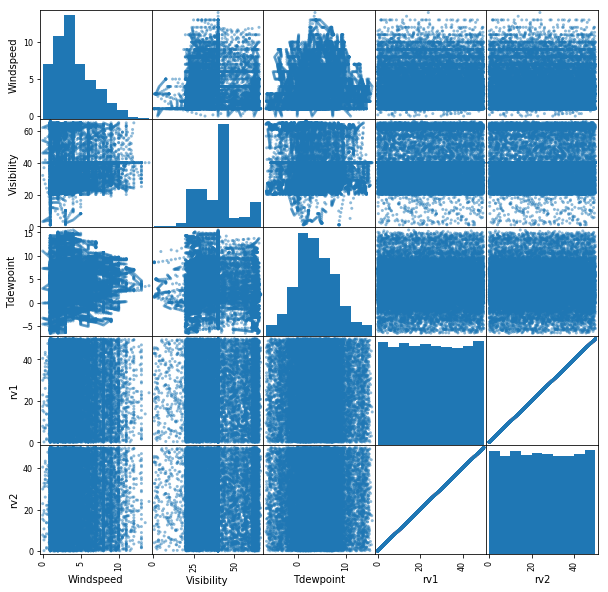

In [ ]:
pd.plotting.scatter_matrix(data.iloc[:,23:28],figsize=(10,10))

In [ ]:
del X['rv1']

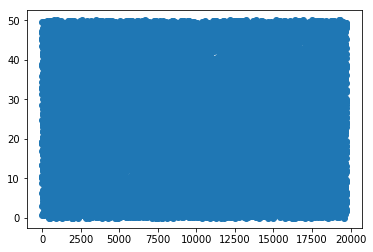

In [ ]:
plt.scatter(np.arange(len(X['rv2'])),X['rv2'])

### As we can see that rv2 does not have any significant variation in it. So, we can remove it.

In [ ]:
del X['rv2']

In [ ]:
X.shape

(19735, 18)

### Lets divide the dataset into train and test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train.shape,X_test.shape

((15788, 18), (3947, 18))

### Lets scale the features

In [ ]:
X.dtypes

lights           int64
T1             float64
RH_1           float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
X_train.shape

(15788, 18)

In [ ]:
def adjusted_r_square(n,k,y,yhat):
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (((1-r_squared)*(k-1))/(n-k-1))
    return r_squared,adjusted_r_squared

### This function will return first the R-Squared and second the Adjusted R Squared

### Now we can start making the model

- #### Logistic Regression

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
linReg.score(X_train,y_train)

0.11745340971836836

In [ ]:
y_predLinReg = linReg.predict(scaler.transform(X_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predLinReg)

(0.104666806280035, 0.9992280044485068)

In [ ]:
mean_squared_error(y_predLinReg,y_test)

9344.917477501756

- #### Decision Tree Regression

In [ ]:
DecisonReg = DecisionTreeRegressor()
DecisonReg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
DecisonReg.fit(X_train,y_train)
DecisonReg.score(X_train,y_train)

1.0

In [ ]:
y_predDecisonReg = DecisonReg.predict(scaler.transform(X_test))

mean_squared_error(y_predDecisonReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


9321.611350392703

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predDecisonReg)

(0.10689975796398965, 0.9992299297973923)

In [ ]:
DecisonReg.feature_importances_

array([0.05180006, 0.04562781, 0.07629121, 0.06764283, 0.05633542,
       0.06705067, 0.04266153, 0.06969242, 0.05219011, 0.04446615,
       0.04778227, 0.06246836, 0.03886411, 0.06613202, 0.07873827,
       0.04574296, 0.03204006, 0.05447374])

In [ ]:
X.columns

Index(['lights', 'T1', 'RH_1', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6',
       'RH_6', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

#### Here decison tree seems to have over fitted

- #### RandomForest

In [ ]:
RandomForestReg = RandomForestRegressor(n_estimators=600)
RandomForestReg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
RandomForestReg.fit(X_train,y_train)
RandomForestReg.score(X_train,y_train)

0.9375643942250844

In [ ]:
y_predRandomForestReg = RandomForestReg.predict(scaler.transform(X_test))

mean_squared_error(y_predRandomForestReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


5188.661062621401

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predRandomForestReg)

(0.5028762435289926, 0.9995713580919047)

- ### Support vector machine 

In [ ]:
svmReg = SVR(C = 0.75)
svmReg

SVR(C=0.75, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svmReg.fit(X_train,y_train)
svmReg.score(X_train,y_train)

0.002492477288680961

In [ ]:
y_predsvmReg = svmReg.predict(scaler.transform(X_test))

mean_squared_error(y_predsvmReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


10394.29349718814

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predsvmReg)

(0.004126465995497042, 0.9991413141571274)

- #### Here we can see that the RBF kernel is performing badly. Lets try Linear kernel

In [ ]:
svmReg = SVR(kernel='linear')
svmReg

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svmReg.fit(X_train,y_train)
svmReg.score(X_train,y_train)

-0.002747353702267308

In [ ]:
y_predsvmReg = svmReg.predict(scaler.transform(X_test))

mean_squared_error(y_predsvmReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


10510.455030951674

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predsvmReg)

(-0.007002928914870088, 0.9991317179046687)

- #### The linear kernel is performing badly. Lets try polynomial kernel

In [ ]:
svmReg = SVR(kernel='poly')
svmReg



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svmReg.fit(X_train,y_train)
svmReg.score(X_train,y_train)



0.0007042476304686129

In [ ]:
y_predsvmReg = svmReg.predict(scaler.transform(X_test))

mean_squared_error(y_predsvmReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


10552.374509756466

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predsvmReg)

(-0.011019219152605508, 0.9991282548830598)

### As we ca see that currently the ensemble learning models are performing the best. So, lets try another ensemble learning 
### classifier Graient boosting 

- #### Gradient Boosting 

In [ ]:
gradBoostReg = GradientBoostingRegressor(loss='ls',n_estimators=500)
gradBoostReg

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gradBoostReg.fit(X_train,y_train)
gradBoostReg.score(X_train,y_train)

0.5586327855427877

In [ ]:
y_predgradBoostReg = gradBoostReg.predict(scaler.transform(X_test))

mean_squared_error(y_predgradBoostReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


6886.083927406792

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predgradBoostReg)

(0.34024676731580306, 0.9994311318241209)

#### Here we worked with all type of loss functions and the best was least square(ls). At higher number of estimator it is overfitting.

### Lastly we try XGBoost

In [ ]:
XGBoostReg = xgb.XGBRegressor(objective="reg:linear",n_estimators=500)
XGBoostReg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
XGBoostReg.fit(X_train,y_train)
XGBoostReg.score(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.5332813958823377

In [ ]:
y_predXGBoostReg = XGBoostReg.predict(scaler.transform(X_test))

mean_squared_error(y_predXGBoostReg,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


6828.262550811396

In [ ]:
adjusted_r_square(X.shape[0],X.shape[1],y_test,y_predXGBoostReg)

(0.34578661268062816, 0.9994359085217879)